<h1>Data Science Internship | Jai Kisan Case Study</h1>

Name: Uma T V

Email: uma.tv1699@gmail.com

Roll No: ME17B170

Institute: Indian Institute of Technology Madras

In [1]:
# setup: import all required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import sklearn 
import statsmodels.api as sm
from sklearn.cluster import k_means
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

<h3>Data Loading and Visualization</h3>

In [2]:
#load the datasets

baselines = pd.read_csv("baselines.csv")
lab_and_vitals = pd.read_csv("lab and vitals.csv")

In [3]:
#visualize the data

baselines.head(10)

,mrn,Age,sex.factor,bmi,hypoxia_ed.factor,smoke_vape,dm.factor,htn.factor,pulm___1.factor,renal___1.factor,...,symptoms___9.factor,symptoms___8.factor,symptoms___3.factor,first_cxr_results___0.factor,first_cxr_results___1.factor,first_cxr_results___2.factor,first_cxr_results___3.factor,duration_symptoms,Ed_before_order_set,event
0,655528,62.321679,Male,20.388645,No,No,No,Yes,Unchecked,Unchecked,...,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,8,No,Yes
1,729545,78.625586,Female,27.554594,Yes,No,Yes,Yes,Unchecked,Unchecked,...,Checked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,20,Yes,Yes
2,805568,70.460677,Female,34.141729,Yes,No,Yes,Yes,Unchecked,Unchecked,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,9,No,No
3,895876,59.043149,Male,19.833296,Yes,Yes,Yes,No,Unchecked,Unchecked,...,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,7,No,No
4,905164,90.477229,Male,19.858003,No,No,Yes,Yes,Unchecked,Unchecked,...,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,25,Yes,No
5,934820,70.614480,Female,28.132920,Yes,Yes,Yes,No,Unchecked,Unchecked,...,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,6,Yes,Yes
6,974919,72.287110,Male,34.979119,No,No,No,No,Unchecked,Unchecked,...,Unchecked,Checked,Checked,Unchecked,Checked,Checked,Unchecked,7,Yes,No
7,989454,47.817602,Female,26.842840,Yes,No,No,Yes,Unchecked,Unchecked,...,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,9,No,Yes
8,1030915,62.987040,Male,33.686343,Yes,No,No,No,Unchecked,Unchecked,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,13,No,No
9,1044125,76.243595,Male,21.458219,No,No,No,Yes,Unchecked,Unchecked,...,Unchecked,Checked,Checked,Unchecked,Unchecked,Checked,Unchecked,8,Yes,No


In [4]:
lab_and_vitals.head(10)

,name,subject,value,time_stamp
0,s_bp_noninvasive (d),89909248,NaN,2020-07-08T13:08:29Z
1,s_bp_noninvasive (d),89909248,NaN,2020-07-08T15:53:04Z
2,s_bp_noninvasive (d),89909248,NaN,2020-07-08T18:37:38Z
3,s_bp_noninvasive (d),89909248,NaN,2020-07-08T21:22:12Z
4,s_bp_noninvasive (d),89909248,62.435513,2020-07-09T00:06:47Z
5,s_bp_noninvasive (d),89909248,NaN,2020-07-09T02:51:21Z
6,s_bp_noninvasive (d),89909248,NaN,2020-07-09T05:35:55Z
7,s_bp_noninvasive (d),89909248,NaN,2020-07-09T08:20:29Z
8,s_bp_noninvasive (d),89909248,59.183847,2020-07-09T11:05:04Z
9,s_bp_noninvasive (d),89909248,61.897375,2020-07-09T13:49:38Z


<h3>Handling Missing Values and Merging Dataframes</h3>

In [5]:
#count the number of missing values in every column of the datasets

missing_values_lab = lab_and_vitals.isnull().sum()

In [6]:
missing_values_lab

name              0
subject           0
value         85815
time_stamp        0
dtype: int64

In [7]:
len(lab_and_vitals)

708106

<p style="color:blue">Only the column "value" has missing information in lab_and_vitals dataframe. Also, without value the entire row of the lab_and_vitals dataframe is not of any use. Hence, we will now revove all the rows of the lab_and_vitals dataframe with missing value of the column "values".</p>




In [8]:
#remove all rows with missing "value"

lab_and_vitals=lab_and_vitals.dropna()

<p style="color:blue">We are only interested in the lab_and_vitals values of the medical record numbers (mrn) in the baselines dataframe. Hence, we remove those subjects from lab_and_vitals that aren't present in baselines</p>

In [9]:
#extract the indices of the rows to be removed in lab_and_vitals

indices=lab_and_vitals.index
to_be_removed_indices=[]
for index in indices:
    if lab_and_vitals["subject"][index] not in baselines["mrn"].unique():
        to_be_removed_indices.append(index)        

In [10]:
len(to_be_removed_indices)

61540

In [11]:
#remove unwanted rows 

lab_and_vitals=lab_and_vitals.drop(to_be_removed_indices)

<p style="color:blue">To deal multiple values of the same test for the same person at different timestamps, we take the mean of the values</p>

In [12]:
lab_and_vitals_mean=lab_and_vitals.groupby(by=["subject","name"]).mean()

In [13]:
lab_and_vitals_mean

value
subject  name                             
655528   s_bp_noninvasive (d)    61.162459
         vs_bp_noninvasive (s)  129.902067
         vs_hr_hr                72.801656
         xp_resp_rate_pt         30.400445
         xp_resp_spo2            91.445496
...                                    ...
90289960 s_bp_noninvasive (d)    61.267579
         vs_bp_noninvasive (s)  130.142080
         vs_hr_hr                75.010405
         xp_resp_rate_pt         30.456829
         xp_resp_spo2            89.991002

[6725 rows x 1 columns]

In [14]:
# we check the different lab tests done for the subjects

lab_and_vitals.name.unique()

array(['s_bp_noninvasive (d)', 'vs_bp_noninvasive (s)', 'vs_hr_hr',
       'xp_resp_rate_pt', 'xp_resp_spo2'], dtype=object)

<p style="color:blue">We now add these 5 tests, whose values are given in the dataframe lab_and_vitals, as columns in baselines. Then, we merge the two dataframes by feeding the information of the lab_and_vitals tests for individuals in baselines dataframe.</p>

In [15]:
#add columns of lab and vitals test names in baselines

NaN = np.nan
for name in lab_and_vitals.name.unique():
    baselines[name] = NaN

In [16]:
#update values of the lab test columns in baselines to the mean values of tests as given in lab_and_vitals_mean

for indices in lab_and_vitals_mean.index:
    baselines[indices[1]][baselines.loc[baselines["mrn"]==indices[0]].index[0]]=lab_and_vitals_mean.loc[indices]       

In [17]:
#check if there are any missing values in baselines

missing_count_values = baselines.isnull().sum()
missing_count_values

mrn                             0
Age                             0
sex.factor                      0
bmi                             0
hypoxia_ed.factor               0
smoke_vape                      0
dm.factor                       0
htn.factor                      0
pulm___1.factor                 0
renal___1.factor                0
renal___2.factor                0
cad.factor                      0
cancer                          0
any_immunosuppression           0
symptoms___1.factor             0
symptoms___2.factor             0
symptoms___10.factor            0
symptoms___9.factor             0
symptoms___8.factor             0
symptoms___3.factor             0
first_cxr_results___0.factor    0
first_cxr_results___1.factor    0
first_cxr_results___2.factor    0
first_cxr_results___3.factor    0
duration_symptoms               0
Ed_before_order_set             0
event                           0
s_bp_noninvasive (d)            0
vs_bp_noninvasive (s)           0
vs_hr_hr      

<p style="color:blue">There arent any missing values now in baselines</p>


In [18]:
#split baselines into features (baselines_X) and labels (baselines_y)

baselines_X=baselines.drop(columns=["event"])
baselines_y=baselines["event"]

<h3>Feature Visualization</h3>

<p style="color:blue">We now visualize the Categorical Features in Baselines</p>


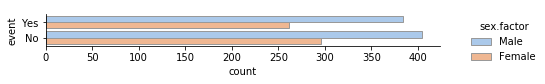

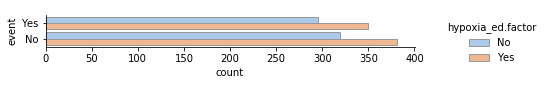

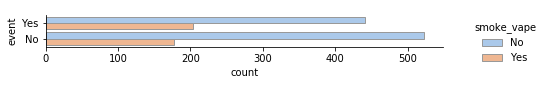

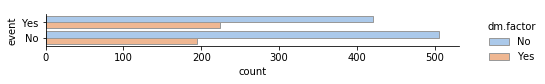

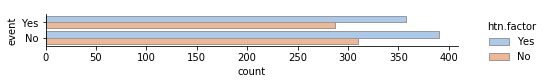

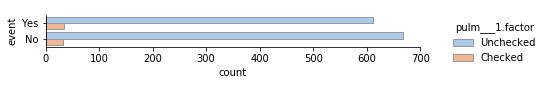

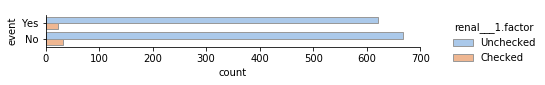

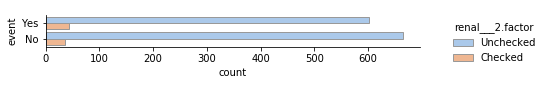

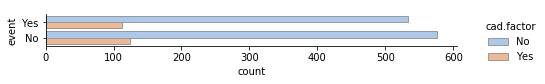

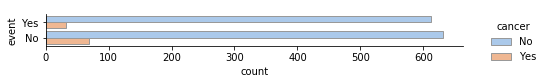

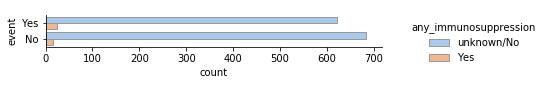

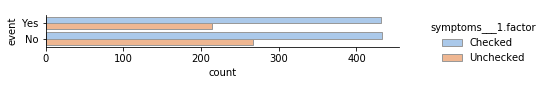

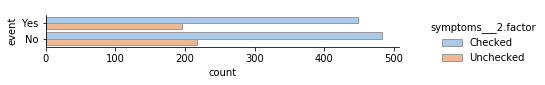

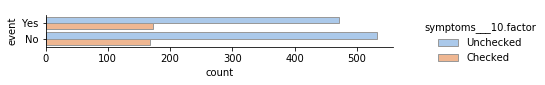

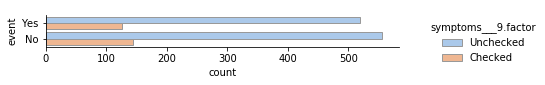

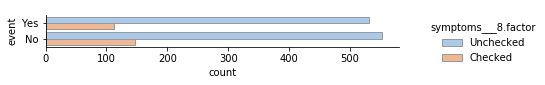

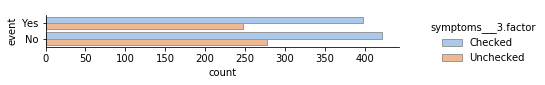

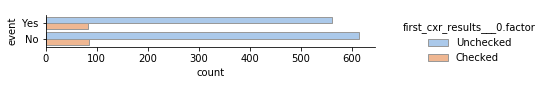

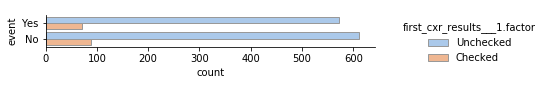

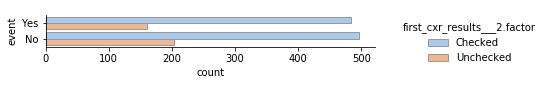

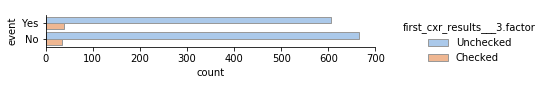

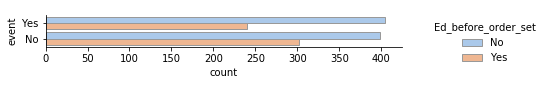

In [19]:
#visualize the effect of categorical features on predicting the outcome

for column in ['sex.factor',  'hypoxia_ed.factor', 'smoke_vape',
       'dm.factor', 'htn.factor', 'pulm___1.factor', 'renal___1.factor',
       'renal___2.factor', 'cad.factor', 'cancer', 'any_immunosuppression',
       'symptoms___1.factor', 'symptoms___2.factor', 'symptoms___10.factor',
       'symptoms___9.factor', 'symptoms___8.factor', 'symptoms___3.factor',
       'first_cxr_results___0.factor', 'first_cxr_results___1.factor',
       'first_cxr_results___2.factor', 'first_cxr_results___3.factor', 'Ed_before_order_set']:
    g=sns.catplot(y="event", hue=column, kind="count",
            palette="pastel", edgecolor=".6",
            data=baselines)
    g.fig.set_figwidth(8)
    g.fig.set_figheight(0.5)

<p style="color:blue">From these graphs, we can say that the categorical features don't seem to have a lot of effect in predicting the outcome. However, a combination of these variables might influence the outcome, for e.g. the same person having multiple symptoms.</p>

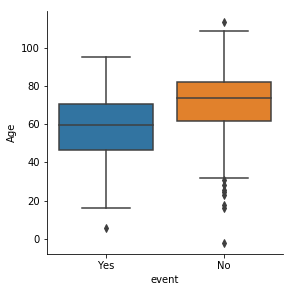

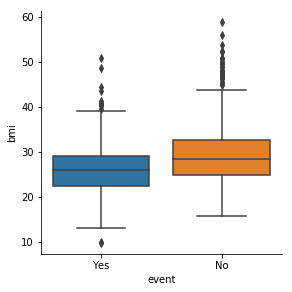

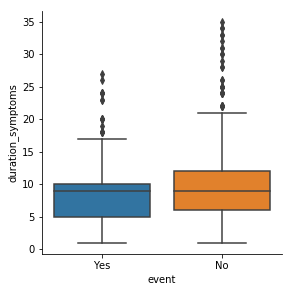

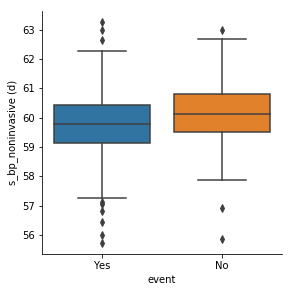

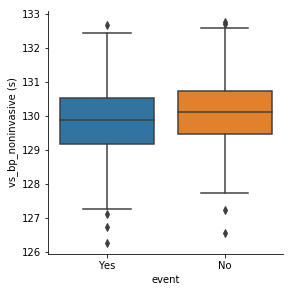

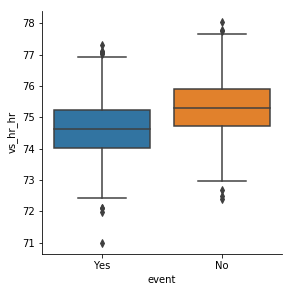

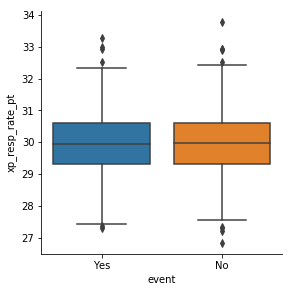

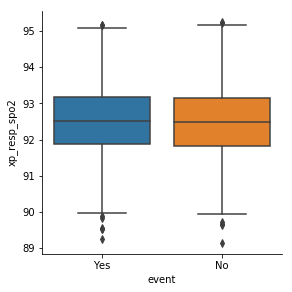

In [20]:
for column in ['Age','bmi', 'duration_symptoms','s_bp_noninvasive (d)', 'vs_bp_noninvasive (s)', 'vs_hr_hr',
               'xp_resp_rate_pt', 'xp_resp_spo2']:
    g=sns.catplot(x="event", y=column, kind="box", data=baselines)
    g.fig.set_figwidth(4)
    g.fig.set_figheight(4)

<p style="color:blue">Again, it looks like even the numerical features don't have a lot of influence in predicting the outcome. 
Hence, we cannot visually remove insignificant features just on observation as none of the features have evident higher influence that all others.</p>

<p style="color:blue">We will now move on to the next step, i.e. preprocessing our data for learning</p>

<h3>One hot Encoding, Normalization and Principal Component Analysis</h3>

In [21]:
#one-hot encode the categorical features in baselines_X

baselines_X=pd.get_dummies(baselines_X)

In [22]:
#normaliza the data in baselines_X

scaler=StandardScaler()
baselines_X=scaler.fit_transform(baselines_X)

<p style="color:blue">We now use PCA to extract the most important features (Principal Components) , which captures the maximum cumulative explained variance ratio.</p>

In [23]:
#calculate the cumulative explained variance ratio of different number of principal components

pca=PCA(random_state=42)
pca.fit_transform(baselines_X,baselines_y)
cumulative=np.cumsum(pca.explained_variance_ratio_)

In [24]:
#view the cumulative explained variance ratio of the 52 principal components

cumulative

array([0.04739718, 0.09340393, 0.13799666, 0.18169951, 0.22379454,
       0.26461463, 0.3049736 , 0.34504624, 0.38474029, 0.42421959,
       0.4622689 , 0.49944121, 0.53603448, 0.57185156, 0.60741733,
       0.64227947, 0.67683622, 0.7100537 , 0.74259611, 0.77468211,
       0.8057432 , 0.83570137, 0.8566646 , 0.87646693, 0.89581675,
       0.91426626, 0.93255626, 0.94982924, 0.96691442, 0.98374011,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

<p style="color:blue">We see that after the first 30 principal components capture the entire cumulative variance ratio. Hence, the number of principal components to be taken is 30.</p>

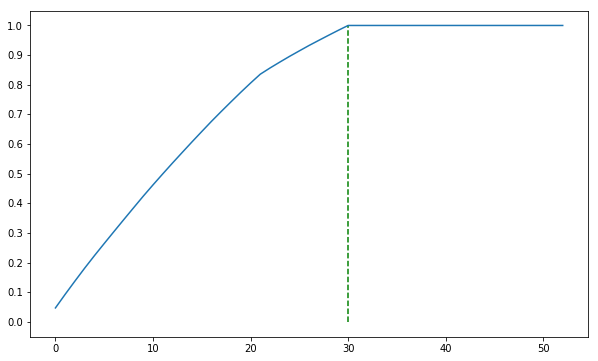

In [25]:
# Visualizing the relevant number of features; graph of number of principal components vs cumulative variance ratio

fig = plt.figure(figsize=[10,6])
plt.vlines(x=30, ymax=1, ymin=0, colors="g", linestyles="--")
sns.lineplot(y=cumulative,x=range(len(cumulative)))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [26]:
#perform PCA with 30 principal components

pca=IncrementalPCA(n_components=30)
baselines_X_pca=pca.fit_transform(baselines_X)

<p style="color:blue">We have finished data cleaning and feature engineering. We now will train models to achieve maximum accuracy with different ML classifiers.</p>

<h3>Machine Learning Models Analysis</h3>

In [27]:
#Test-Train split for training and calculation accuracy

X_train, X_test, y_train, y_test = train_test_split(baselines_X_pca, baselines_y, test_size=0.8, random_state=42)

In [28]:
Classifiers=[]
Accuracies=[]

In [29]:
#Logistic Regression Classifier

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Logistic Regression Classifier gives an accuracy score of",accuracy_score(y_test, y_pred))
Classifiers.append("Logistic Regression Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

#Random Forest Classifier

clf=RandomForestClassifier(n_estimators=50000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Random Forest Classifier gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("Random Forest Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

#SVM Classifier 
#A function that gives different kernels of the SVM classifier

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")
    
#SVM Classifier

for i in range(4):
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("SVM Classifier ",kernels[i]," kernel gives an accuracy score of ",accuracy_score(y_test, y_pred))
    Classifiers.append("SVM Classifier "+kernels[i]+" kernel")
    Accuracies.append(accuracy_score(y_test, y_pred))
    
#Decision Tree Classifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Decision Tree Classifier gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("Decision Tree Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

#K Nearest Neighbours Classifier

neigh = KNeighborsClassifier(n_neighbors=91)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("K Nearest Neighbours Classifier gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("KNN Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

#Linear Discriminant Analysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Linear Discriminant Analysis gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("Linear Discriminant Analysis Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

#Gaussian Naive Bayes Classifier 

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Gaussian Naive Bayes Classifier gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("Gaussian Naive Bayes Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

#Multi layer perceptron Classifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5000, 2), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Multi layer perceptron Classifier gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("Multi layer perceptron Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

#Gaussian Process Classifier

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
gpc.fit(X_train, y_train)
y_pred = gpc.predict(X_test)
print("Gaussian Process Classifier gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("Gaussian Process Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

#Adaboost Classifier 

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Adaboost Classifier gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("Adaboost Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

#Quadratic Discriminant Analysis Classifier

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Quadratic Discriminant Analysis gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("Quadratic Discriminant Analysis Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

#XG Boost Classifier

model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)
print("XG Boost Classifier gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("XG Boost Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

#Gradient Boosting Classifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Gradient Boosting Classifier gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("Gradient Boosting Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

Logistic Regression Classifier gives an accuracy score of 0.8076208178438662
Random Forest Classifier gives an accuracy score of  0.7481412639405205
SVM Classifier  Polynomial  kernel gives an accuracy score of  0.5353159851301115
SVM Classifier  RBF  kernel gives an accuracy score of  0.6877323420074349
SVM Classifier  Sigmoid  kernel gives an accuracy score of  0.7788104089219331
SVM Classifier  Linear  kernel gives an accuracy score of  0.8039033457249071
Decision Tree Classifier gives an accuracy score of  0.662639405204461
K Nearest Neighbours Classifier gives an accuracy score of  0.6840148698884758
Linear Discriminant Analysis gives an accuracy score of  0.8020446096654275
Gaussian Naive Bayes Classifier gives an accuracy score of  0.7072490706319703
Multi layer perceptron Classifier gives an accuracy score of  0.7713754646840149
Gaussian Process Classifier gives an accuracy score of  0.800185873605948
Adaboost Classifier gives an accuracy score of  0.70817843866171
Quadratic Di

In [30]:
#Store all the accuracies data in a pandas dataframe

Classifiers_and_Accuracies=pd.DataFrame()
Classifiers_and_Accuracies["Classifiers"]=Classifiers
Classifiers_and_Accuracies["Accuracies"]=Accuracies
Classifiers_and_Accuracies

,Classifiers,Accuracies
0,Logistic Regression Classifier,0.807621
1,Random Forest Classifier,0.748141
2,SVM Classifier Polynomial kernel,0.535316
3,SVM Classifier RBF kernel,0.687732
4,SVM Classifier Sigmoid kernel,0.778810
5,SVM Classifier Linear kernel,0.803903
6,Decision Tree Classifier,0.662639
7,KNN Classifier,0.684015
8,Linear Discriminant Analysis Classifier,0.802045
9,Gaussian Naive Bayes Classifier,0.707249


<p style="color:blue">Hence, we see that the Logisitic Regression Classifier gives the maximum Accuracy. </p>

In [31]:
#Visualize the classifiers that give >0.8 accuracy

Classifiers_and_Accuracies.loc[Classifiers_and_Accuracies["Accuracies"]>0.8]

,Classifiers,Accuracies
0,Logistic Regression Classifier,0.807621
5,SVM Classifier Linear kernel,0.803903
8,Linear Discriminant Analysis Classifier,0.802045
11,Gaussian Process Classifier,0.800186


<p style="color:blue">Hence, Logitic Regression performs the best on our data. Now, we tune the hyperparameters of logisitic regression to try and achieve higher accuracy</p>


<h3>Hyperparameter Tuning</h3>

In [32]:
#Logistic Regression Hyperparameter Tuning

folds=KFold(n_splits=3,shuffle=True,random_state=42)
params = {"solver": ['lbfgs', 'sag','saga','newton-cg','liblinear' ],"C" : [0.01,0.1,1,5,10,100]}
model = LogisticRegression()
model_cv = GridSearchCV(estimator = model, param_grid = params, scoring= 'accuracy', 
                     cv = folds, verbose = 1, return_train_score=True)   
model_cv.fit(X_train, y_train)  

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.8s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 100],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg',
                                    'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', ve

In [33]:
#viewing the best parameters

best_C = model_cv.best_params_['C']
best_solver = model_cv.best_params_['solver']
print("best_C= ",best_C)
print("best_solver= ",best_solver)

best_C=  1
best_solver=  lbfgs


In [34]:
#Accuracy with the tuned Logistic Regression model

y_pred=model_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8076208178438662

<p style="color:blue">We see that after hyperparameter tuning the maximum accuracy obtained is 80.76% for the test data.</p>

<p style="color:blue">We now try a bagging classifier with Logistic Regression as the base estimator to further improve accuracy.</p>

<h3>Bagging</h3>

In [35]:
#Bagging Classifier

clf = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=10000, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("BaggingClassifier gives an accuracy score of ",accuracy_score(y_test, y_pred))
Classifiers.append("Bagging Classifier")
Accuracies.append(accuracy_score(y_test, y_pred))

BaggingClassifier gives an accuracy score of  0.8085501858736059


<p style="color:blue">We see that bagging has improved the accuracy of logistic regression.</p>

In [36]:
#prediction on the entire baselines dataset using the bagging model

y_pred=clf.predict(baselines_X_pca)
accuracy_score(baselines_y, y_pred)

0.8118959107806691

<h3>Conclusion</h3>

<p style="color:blue">Hence, Tuned and bagged Logistic Regression best predicts our data with the model fitting 81.19% of the entire baselines dataset provided correctly</p>